**# PART II**

## Tools & Paths

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DIR_DATASETS = 'Datasets/'

## Load Data

#### **Features:**
- Historical
    - Gender(GD): 0 = **Male**, 1 = **Female**
    - Age(AG): [33-90]
    - Risk Factors(RF): 0 = **No risk**, 1 = **risk**
- Measurements
    - Systolic Blood Pressure(SBP): [**0.6 - 11.5**]
    - Heart Rate (HR): [**40 - 153**]
    - ST elevation (ST): {**0**, **1**}
- Exams
    - Creatinine(CT): [**0.6 - 11.5**]
    - KILLIP class : 1 = **No signs**, 2 = **Mild to moderate sign**, 3 = **Pulmonary edema (Severe)**

In [2]:
HISTORICAL = ['GD','AG','RF']
MEASUREMENTS = ['SBP','HR1','ST','HR2']
EXAMS = ['CT','KL']
TARGET = 'event'
FEATURES_NAMES = HISTORICAL + MEASUREMENTS + EXAMS

data = pd.read_csv(DIR_DATASETS+ 'DATA.txt',sep="   ", header=None, engine='python')
data.columns = FEATURES_NAMES + [TARGET]
N_SAMPLES = data.shape[0]
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      457 non-null    float64
 1   AG      457 non-null    float64
 2   RF      457 non-null    float64
 3   SBP     457 non-null    float64
 4   HR1     457 non-null    float64
 5   ST      457 non-null    float64
 6   HR2     457 non-null    float64
 7   CT      457 non-null    float64
 8   KL      457 non-null    float64
 9   event   457 non-null    float64
dtypes: float64(10)
memory usage: 35.8 KB


## Data Pre-Processing

In [4]:
data['GD'] = data['GD'].astype(int)
data['RF'] = data['RF'].astype(int)
data['ST'] = data['ST'].astype(int)
data['KL'] = data['KL'].astype(int)
data['AG'] = data['AG'].astype(int)
data['SBP'] = data['SBP'].astype(int)
data[TARGET] = data[TARGET].astype(int)
LABELS = np.unique(data[TARGET])
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event
0,1,33,0,132,91.579173,1,90.0,0.8,1,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1
3,0,79,0,147,106.420820,1,110.0,0.9,1,1
4,0,61,0,107,82.148302,0,80.0,1.1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      457 non-null    int64  
 1   AG      457 non-null    int64  
 2   RF      457 non-null    int64  
 3   SBP     457 non-null    int64  
 4   HR1     457 non-null    float64
 5   ST      457 non-null    int64  
 6   HR2     457 non-null    float64
 7   CT      457 non-null    float64
 8   KL      457 non-null    int64  
 9   event   457 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 35.8 KB


In [6]:
data.describe()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.787746,64.540481,0.153173,131.783370,75.777039,0.531729,75.660832,1.379431,1.212254,0.391685
std,0.409352,11.476473,0.360549,26.692102,17.104161,0.499539,17.563321,1.266251,0.558843,0.488662
min,0.000000,33.000000,0.000000,60.000000,40.692798,0.000000,44.000000,0.600000,1.000000,0.000000
25%,1.000000,56.000000,0.000000,112.000000,63.283457,0.000000,63.000000,1.000000,1.000000,0.000000
50%,1.000000,65.000000,0.000000,132.000000,74.017537,1.000000,74.000000,1.100000,1.000000,0.000000
75%,1.000000,74.000000,0.000000,148.000000,86.231702,1.000000,86.000000,1.300000,1.000000,1.000000
max,1.000000,91.000000,1.000000,221.000000,151.397760,1.000000,153.000000,11.500000,3.000000,1.000000


### Multi-Sensor Data Fusion
<img src="Measurements Fusion.png" width = 500px>

In [7]:
from scipy.stats import norm

STD_HR = np.array([2,0.5])

def fuse_sensor_data(data):
    std_power2 = np.power(STD_HR,2)
    gamma = np.sum(1 / std_power2)
    s = 1/ gamma
    data['HR_F']= data.HR1/(gamma* std_power2[0]) + data.HR2/(gamma* std_power2[1])
    return data

In [8]:
data = fuse_sensor_data(data)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371


### Clinical Guidelines

In [9]:
cond = ((data.CT >= 1.3) & (data.ST == 1)) | (data.KL>=2)

data['Clinical'] = np.where(cond, 1, 0)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459,1
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460,0
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371,0


## Continuous Variables
* Age
* SBP
* HR Fused (HR1 + HR2)
* CRT

STD Comparison
HR1: 17.1041612429131
HR2: 17.563320835786147
HR Fused: 17.525875349838806


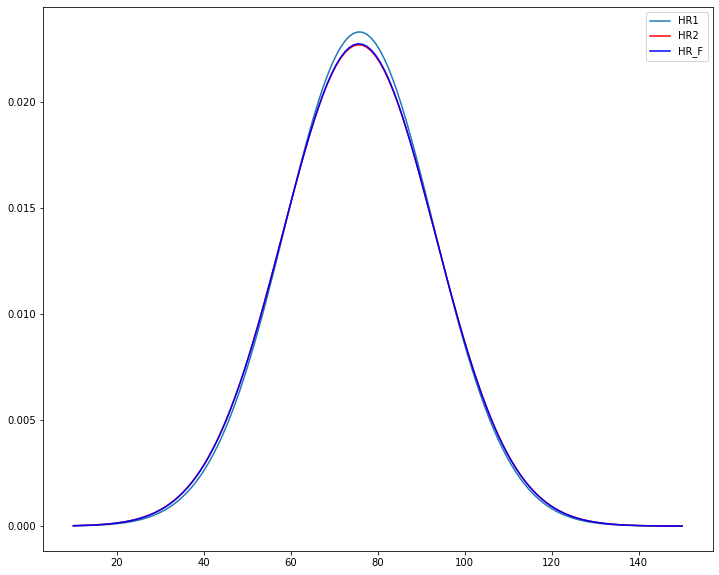

In [10]:
print('STD Comparison')
print('HR1:',data['HR1'].std())
print('HR2:',data['HR2'].std())
print('HR Fused:',data['HR_F'].std())

plt.figure(figsize=(12,10))
x = np.linspace(10,150, 140)
plt.plot(x,norm.pdf(x,data['HR1'].mean(),data['HR1'].std()),label = 'HR1')
plt.plot(x,norm.pdf(x,data['HR2'].mean(),data['HR2'].std()),'r',label = 'HR2')
plt.plot(x,norm.pdf(x,data['HR_F'].mean(),data['HR_F'].std()),'b',label = 'HR_F')
plt.legend()
plt.show()

### Discrete Variables:
- Gender
- Risk Factors
- Standard Elevation
- KILLIP class
- Clinical 

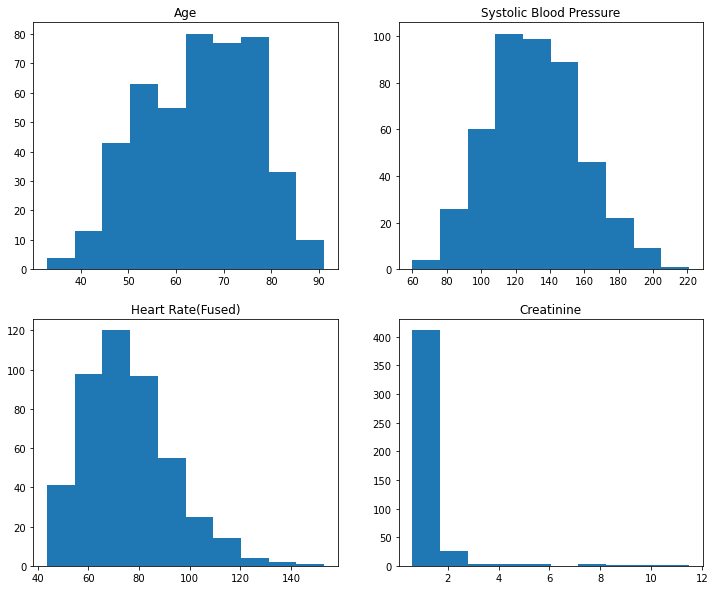

In [11]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(12, 10)
axs[0,0].set_title('Age')
axs[0,0].hist(data.AG)

axs[0,1].set_title('Systolic Blood Pressure')
axs[0,1].hist(data.SBP)

axs[1,0].set_title('Heart Rate(Fused)')
axs[1,0].hist(data.HR_F)

axs[1,1].set_title('Creatinine')
axs[1,1].hist(data.CT)
plt.show()

### Goodness of Fit Tests

The goodness of fit test is used to test if sample data fits a distribution from a certain population (i.e. in this case with a **normal distribution**)

- Chi-Square
    - The chi-square Goodness of fit is to fit one categorical variable to a distribution
- Kolmogorov-Smirnov(KS Test)
    - This test  is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test)
- Shapiro wilk
    - Calculates a W value that will tell you if a random sample came from a normally distributed population. 
    - Recommended for samples up to n=2000.

Reference: https://www.statisticshowto.com/goodness-of-fit-test/

In [12]:
from scipy.stats import ks_1samp, shapiro,chisquare

def goodfitness_tests(data,p_value,columns = ['AG','SBP','HR_F','CT']):
    p_values = {}
    for c in columns:
        _, ks = ks_1samp(data[c], norm.cdf)
        _, s = shapiro(data[c])
        _, chs = chisquare(data[c])
        p_values[c] = {
            'ks': ks >= p_value,
            'shapiro': s >= p_value,
            # 'anderson':
            'chi-square': chs>=p_value
        }
    return p_values

Test with following p_values: [0.05, 0.10, 0.15]

In [13]:
pd.DataFrame(goodfitness_tests(data,0.05)).T

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,True,False
HR_F,False,False,False
CT,False,False,False


In [14]:
pd.DataFrame(goodfitness_tests(data,0.1)).T

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,True,False
HR_F,False,False,False
CT,False,False,False


In [15]:
pd.DataFrame(goodfitness_tests(data,0.15)).T

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,False,False
HR_F,False,False,False
CT,False,False,False


After the analysis of the previous statistical tests and the histograms we can see that only the SBP follows a gaussian distribution.

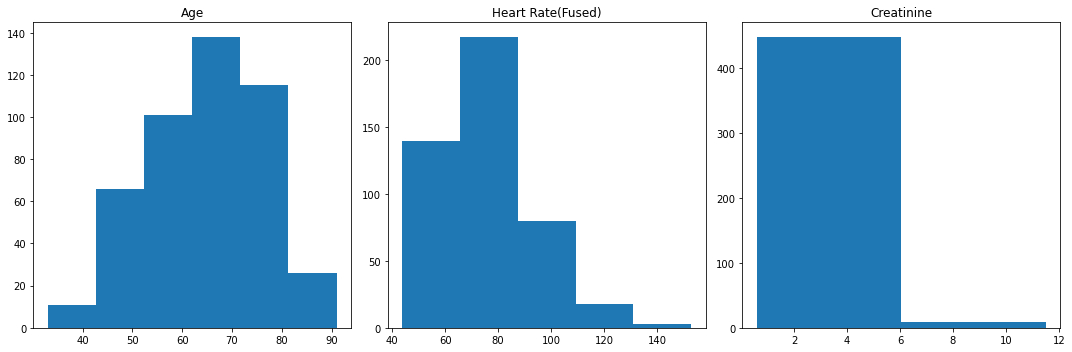

In [16]:
bins = {}
fig,axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
bins_age = 6
bins_hrf = 5
bins_ct = 2

axs[0].set_title('Age')
bins['AG'] = axs[0].hist(data.AG,bins_age)

axs[1].set_title('Heart Rate(Fused)')
bins['HR_F'] = axs[1].hist(data.HR_F,bins_hrf)

axs[2].set_title('Creatinine')
bins['CT'] = axs[2].hist(data.CT,bins_ct)
fig.tight_layout()

In [17]:
def discretize(data,bins,cols = ['AG','HR_F','CT']):
    probs = {}
    for c in cols:

        intervals = bins[c][1]
        intervals_count = bins[c][0]
        probs[c] = np.zeros((len(intervals_count),2))

        for i in range(len(intervals_count)):
        
            cond = (data[c] >= intervals[i]) & (data[c] < intervals[i+1])
            data_aux = data[cond]
            n_no_event = data_aux[data_aux[TARGET] == 0].shape[0]
            n_event = data_aux[data_aux[TARGET] == 1].shape[0]
            probs[c][i,:] = [n_no_event/intervals_count[i],n_event/intervals_count[i]]

    return probs

def binize(x, bins, columns=["AG","HR_F","CT"]):

    bin = {

    }

    for c in columns:
        intervals = bins[c][1]
        for i in range(len(intervals)-1):
            if (x[c] >= intervals[i]) & (x[c] < intervals[i+1]):
                bin[c] = i
                break
            elif (i == (len(intervals)-2)):
                bin[c] = i
    return bin

In [20]:
discretized_probs = discretize(data, bins)

In [21]:
DISCRETIZED_COLS = ['AG','HR_F','CT']
DISCRETE_COLS = ['GD','RF','ST','KL','Clinical']
CONTINUOUS_COLS = ['SBP','AG','HR_F','CT']

In [22]:
def likelihood_discrete(data,x,label,n,columns = DISCRETE_COLS,discretized_cols = DISCRETIZED_COLS):
    probs= []
    for c in columns:
        cond = (data[TARGET] == label) & (data[c] == x[c])
        data_l = data[cond]
        probs.append(data_l[c].shape[0]/n)
    bins_x = binize(x,bins)

    for c in discretized_cols:
        probs.append(discretized_probs[c][bins_x[c],label])
    return np.prod(probs)

In [23]:
labels_size = data[TARGET].value_counts()
probs_target = []
discrete_vals = np.zeros((N_SAMPLES,len(labels_size)))
discrete_guess = np.zeros(N_SAMPLES)

for s in labels_size:
    probs_target.append(s/N_SAMPLES)

print('Value counts',labels_size)
print('Probabilility of labels respectevely:\n',probs_target)

for row in range(N_SAMPLES):
    for l,size in enumerate(labels_size):
        discrete_vals[row][l] = likelihood_discrete(data,data.iloc[row],l,size) * probs_target[l]
    index = np.argmax(discrete_vals[row])
    discrete_guess[row] = index

data['Discrete_guess'] = discrete_guess.astype(int)
data.head()

Value counts 0    278
1    179
Name: event, dtype: int64
Probabilility of labels respectevely:
 [0.6083150984682714, 0.3916849015317287]


,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893,0,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227,0,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459,1,1
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460,0,1
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371,0,0


In [24]:
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893,0,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227,0,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459,1,1
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460,0,1
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371,0,0


#### **Bayes theorem (Continuous)**
<img src="Bayes_continuous.png" width = 400px>

In [25]:
def calc_mean_std(data,labels,columns = CONTINUOUS_COLS):
    n_cols = len(columns)
    n_labels = len(labels)
    mean_feats = np.zeros((n_cols,n_labels))
    std_feats = np.zeros((n_cols,n_labels))
    
    for i,l in enumerate(labels):
        for k,col in enumerate(columns):
            data_col = data[data[TARGET] == l]
            mean_feats[k][i] = data_col[col].mean()
            std_feats[k][i] = data_col[col].std()
    return mean_feats,std_feats
    
def likelihood_continuous(data,probs_target,mean,std,columns = CONTINUOUS_COLS):
    probs_continuous = []

    for i,l in enumerate(probs_target):
        probs = [l]
        for k,col in enumerate(columns):            
            probs.append(norm.pdf(data[col],mean[k][i], std[k][i]))
        probs_continuous.append(float(np.prod(probs)))
    return probs_continuous

In [26]:
sbp_labels = np.unique(data['SBP'])

labels = np.unique(data[TARGET])
continuous_vals = np.zeros((N_SAMPLES,len(probs_target)))
continuous_guess = np.zeros(N_SAMPLES)
feats_mean, feats_std = calc_mean_std(data,labels,columns=['SBP'])

for i in range(N_SAMPLES):
    probs = likelihood_continuous(data.iloc[i],probs_target,feats_mean,feats_std,columns = ['SBP'])
    continuous_vals[i] = probs
    index = np.argmax(probs)
    continuous_guess[i] = index

data['Continuous_guess'] = continuous_guess.astype(int)
data.head()


,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess,Continuous_guess
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893,0,0,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227,0,0,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459,1,1,0
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460,0,1,0
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371,0,0,0


In [27]:
decision = continuous_vals * discrete_vals
data['decision'] = (decision[:,1] > decision[:, 0]).astype(int)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess,Continuous_guess,decision
0,1,33,0,132,91.579173,1,90.0,0.8,1,0,90.092893,0,0,0,0
1,1,69,0,147,52.785861,0,52.0,1.4,1,0,52.046227,0,0,0,0
2,1,63,0,142,40.692798,1,44.0,1.1,3,1,43.805459,1,1,0,1
3,0,79,0,147,106.420820,1,110.0,0.9,1,1,109.789460,0,1,0,1
4,0,61,0,107,82.148302,0,80.0,1.1,1,0,80.126371,0,0,0,0


## Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score

def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod() ** (1.0 / len(a))

def sensitivity(tp, fn):
    return tp/(tp+fn)

def specificity(fp, tn):
    return tn/(fp+tn)
def accuracy(real,pred):
    return accuracy_score(real,pred)

def eval(pred):
    tn, fp, fn, tp = confusion_matrix(data.event, pred).ravel()
    sensitivity_val = sensitivity(tp, fn)
    specificity_val = specificity(tp, fn)
    gm = geo_mean([specificity_val,sensitivity_val])
    
    return [sensitivity_val,specificity_val,gm,f1_score(data.event, pred),accuracy(data.event,pred)]


In [29]:
eval_discrete = eval(data['Discrete_guess'])
eval_continous = eval(data['Continuous_guess'])
eval_decision = eval(data['decision'])
metrics = ['SE','SP','GM','F1-SCORE','Accuracy']
pred_df = pd.DataFrame(data = [eval_discrete,eval_continous,eval_decision],index = ['Discrete','Continous','Combination'],columns = metrics)
pred_df

,SE,SP,GM,F1-SCORE,Accuracy
Discrete,0.575419,0.424581,0.494279,0.691275,0.798687
Continous,0.229050,0.770950,0.420222,0.321569,0.621444
Combination,0.541899,0.458101,0.498241,0.671280,0.792123


## Reflections

### Is the performance of the classifier acceptable?

### Should all information (inputs/variables) be used?

### Conditional probabilities: normal distribution?